In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing dataset
data = pd.read_excel('iris (1).xls')

In [3]:
# viewing data
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# shape of data
data.shape

(150, 5)

In [5]:
# summary statistics of data
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# viewing data type of all the columns
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

#### Filling missing values

In [7]:
# count of missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

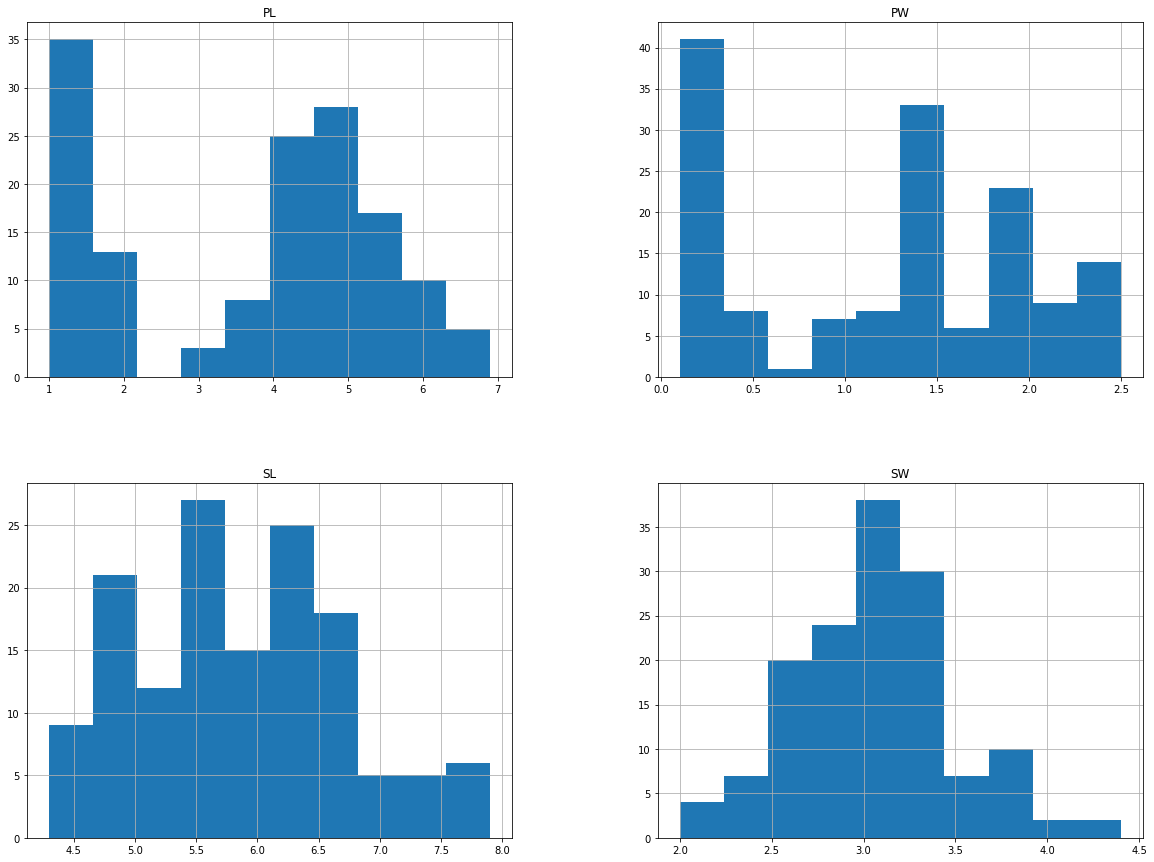

In [8]:
# Plotting Bar graph of all float data type
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize = (20,15))
plt.show()

In [9]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [10]:
# Filling missing values
for i in ['SL', 'SW', 'PL']:
    data[i] = data[i].fillna(data[i].median())

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### Outlier Detection and removing

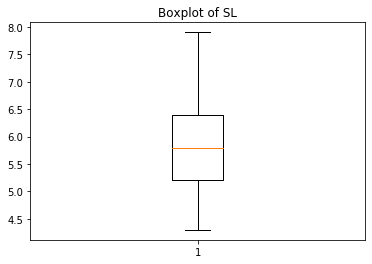

In [12]:
#boxplot
plt.boxplot(data['SL'])
plt.title('Boxplot of SL')
plt.show()

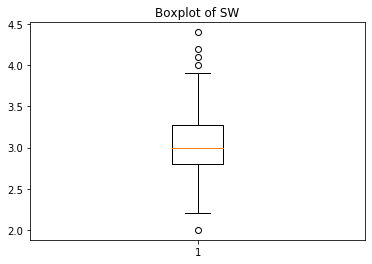

In [13]:
#boxplot
plt.boxplot(data['SW'])
plt.title('Boxplot of SW')
plt.show()

In [14]:
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')

In [15]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [16]:
# inter quartile range
IQR = Q3-Q1
IQR

0.4500000000000002

In [17]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [18]:
outlier = []
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [19]:
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [20]:
ind = data['SW'] > up_lim

In [21]:
outlier_index = data.loc[ind].index

In [22]:
# removing outliers
data.drop(outlier_index, inplace = True)

In [23]:
data.describe()

,SL,SW,PL,PW
count,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.016438,3.845205,1.225342
std,0.817166,0.382555,1.706593,0.755834
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


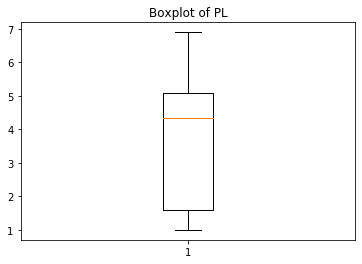

In [24]:
#boxplot
plt.boxplot(data['PL'])
plt.title('Boxplot of PL')
plt.show()

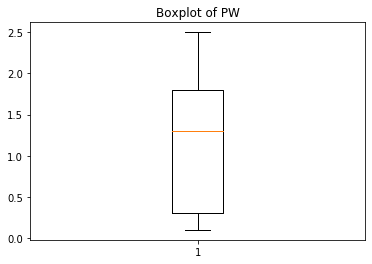

In [25]:
#boxplot
plt.boxplot(data['PW'])
plt.title('Boxplot of PW')
plt.show()

In [26]:
## Label Encoding target Classification

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoder = LabelEncoder()

In [29]:
data['Classification'] = label_encoder.fit_transform(data['Classification'])

In [30]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


### Model 1 - Logistic Regression - After Minmax Scaling

In [31]:
# separating into feature and target
X = data.drop('Classification', axis=1)
y = data['Classification']

In [32]:
# Min max Scaling

In [33]:
X

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [34]:
# minmax scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X.loc[:,:] = mms.fit_transform(X)
X

,SL,SW,PL,PW
0,0.222222,0.789474,0.067797,0.041667
1,0.166667,0.526316,0.067797,0.041667
2,0.416667,0.631579,0.050847,0.041667
3,0.083333,0.578947,0.084746,0.041667
4,0.194444,0.842105,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.526316,0.711864,0.916667
146,0.555556,0.263158,0.677966,0.750000
147,0.611111,0.526316,0.567797,0.791667
148,0.527778,0.736842,0.745763,0.916667


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# spliting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# creating model Logistic Regression
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
# confusion matrix
confusion_matrix(y_test, y_pred_logit)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [41]:
# Finding accuracy
accuracy_score(y_test, y_pred_logit)

0.9333333333333333

#### Accuracy of Logistic Regression after Minmax Scaling 93%

### Model 2 - kNN - After Minmax Scaling

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
## finding optimum k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

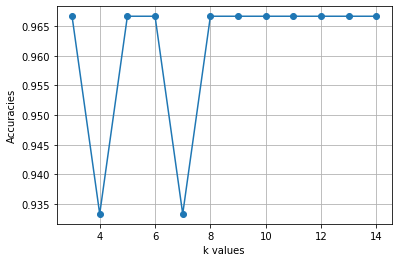

In [44]:
# plotting values of k / neighbours taken vs their accuracy
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [45]:
metric_k

[0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

In [46]:
# creating model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [47]:
# confusion matrix
confusion_matrix(y_test, y_pred_kNN)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [48]:
# Finding accuracy
accuracy_score(y_test, y_pred_kNN)

0.9666666666666667

#### Accuracy of kNN after Minmax Scaling 96%, with neighbors taken as 5

### Model 3- SVM After Minmax Scaling

#### SVM - linear kernel

In [49]:
from sklearn.svm import SVC

In [50]:
# creating svm model with linear kernel
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [51]:
# confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [52]:
# Finding accuracy
accuracy_score(y_test, y_pred_svm)

0.9666666666666667

#### SVM Linear Model - Accuracy - 96% with minmax scaling used

#### SVM -radial basis fn kernel

In [53]:
# svm model with radial basis function
svm_clf2 = SVC(kernel='rbf')
svm_clf2 = svm_clf2.fit(X_train, y_train)
y_pred_svm2 = svm_clf2.predict(X_test)

In [54]:
# confusion matrix
confusion_matrix(y_test, y_pred_svm2)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [55]:
# Finding accuracy
accuracy_score(y_test, y_pred_svm2)

0.9333333333333333

#### SVM Linear Model - Accuracy - 93% with minmax scaling used

### Model 4- Logistic Regression after using Standard Scaling

In [56]:
# separating into feature and target
X = data.drop('Classification', axis=1)
y = data['Classification']

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
# Standard Scaling
sc = StandardScaler()

In [59]:
X.loc[:,:] = sc.fit_transform(X)

In [60]:
# spliting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# creating model Logistic Regression
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)

In [62]:
# confusion matrix
confusion_matrix(y_test, y_pred_logit)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [63]:
# Finding accuracy
accuracy_score(y_test, y_pred_logit)

0.9666666666666667

#### Logistic Regression - Accuracy - 96% with standard scaling used (better than minmax scaling)

### Model 5- kNN after using Standard Scaling

In [64]:
## finding optimum k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

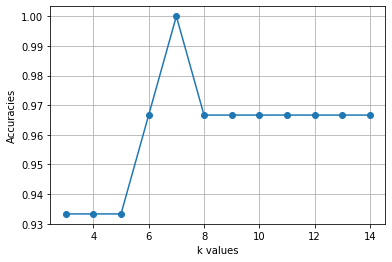

In [65]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [66]:
# creating model kNN with optimum value for neigbours which here is 7
classifier = KNeighborsClassifier(n_neighbors=7)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [67]:
# confusion matrix
confusion_matrix(y_test, y_pred_kNN)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

In [68]:
# Finding accuracy
accuracy_score(y_test, y_pred_kNN)

1.0

#### knn Model (when neighbors = 7 Highest Accuracy)- Accuracy - 100% with standard scaling used

### Model 6- SVM after using Standard Scaling

In [69]:
# creating svm model with linear kernel
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [70]:
# confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[12,  0,  0],
       [ 0,  6,  2],
       [ 0,  0, 10]], dtype=int64)

In [71]:
# Finding accuracy
accuracy_score(y_test, y_pred_svm)

0.9333333333333333

In [72]:
# svm model with rbf kernel
svm_clf = SVC(kernel='rbf')
svm_clf = svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [73]:
# confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [74]:
# Finding accuracy
accuracy_score(y_test, y_pred_svm)

0.9666666666666667

### Model 7 - Decision Tree

In [75]:
# separating into feature and target
X = data.drop('Classification', axis=1)
y = data['Classification']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
# creating decision tree model
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [79]:
# confusion matrix
confusion_matrix(y_test, y_pred_dt)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [80]:
# Finding accuracy
accuracy_score(y_test, y_pred_dt)

0.9333333333333333

#### Accuracy of Decision Tree Algorithm is 93%

### Model 8 - Random Forest Algorithm

In [81]:
# separating into feature and target
X = data.drop('Classification', axis=1)
y = data['Classification']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
# creating random forest model
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)

In [85]:
# confusion matrix
confusion_matrix(y_test, y_pred_rf)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [86]:
# Finding accuracy
accuracy_score(y_test, y_pred_rf)

0.9333333333333333

#### Accuracy of Random Forest Algorithm is 93%

### Accuracy is more for kNN , 100 % accuracy received when standard scaling was used.
### For this problem of Classification kNN model (when neighbors chosen as 7) produces highest accuracy (i.e, 100% accuracy).
### kNN is the best model for this classification problem.( Standard Scaling Used)